In [1]:
import os
from pathlib import Path
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import scipy.signal as ss

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

%matplotlib inline

## Goal
- reflectance = (raw data - dark reference) / **(white reference - dark reference)**

- Radiance dataset:
    - Get all panels in a .npy file
    - Get a plot for the three panels

### Working Paths
- Load Dark Ref file from this folder
- Load Raw image of White Reference

In [2]:
#Could change name to reference_path
## Radiance Dataset
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-HSI")
path_list = os.listdir(files_path)
target_path = files_path / path_list[-1] / 'calibrations'
print(target_path)
## Raw dataset
#files_path_r = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\Raw-Dark-Tests\Kestrel_CCA_Raw\Lithogenic_Spectra_gradient_2021-06-25_13-10-46\capture")

## NIWA ANT CCA Radiance dataset
#files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-HSI")

## Output path
out_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Output")

C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-HSI\NIWA-CCA_WhiteReference_2004-08-06_00-36-15\calibrations


In [3]:
## Radiance
hdr_list = list(target_path.glob('*.hdr'))
dat_list = list(target_path.glob('*.dat')) #.dat for radiance

#whiteref_hdr = hdr_list[11]
#whiteref_rad = dat_list[11]

## RAW
#hdr_list = list(files_path.glob('*.hdr'))
#raw_list = list(files_path.glob('*.raw'))

# Dark reference is always the first file in the directory
#darkref_hdr = hdr_list[0]
#darkref_raw = raw_list[0]

#whiteref_hdr = hdr_list[1]
#whiteref_raw = raw_list[1]

### Open white reference file

In [4]:
## ENVI open uses the header metadata. Until .load method is used data will be loaded to memory.
#dark_open = sp.envi.open(darkref_hdr, darkref_raw)
hdr = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-HSI\NIWA-CCA_WhiteReference_2004-08-06_00-36-15\CALIBR~1\NIWA-C~1.HDR"
dat = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-HSI\NIWA-CCA_WhiteReference_2004-08-06_00-36-15\CALIBR~1\NIWA-C~1.DAT"
white_open = sp.envi.open(hdr, dat)

## Extract wavelengths as a vector for pre-processing
bands_vector = white_open.metadata['wavelength']

In [5]:
print('First and last band')
print(bands_vector[0], bands_vector[-1])

First and last band
394.360000 1001.960000


### White reference

ImageView object:
  Display bands       :  [144, 92, 42]
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 2632.0]
    G: [6.0, 1613.0]
    B: [0.0, 663.0]

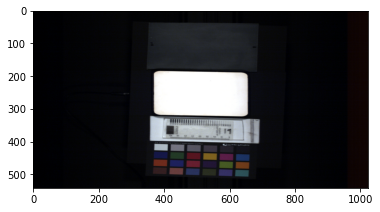

In [6]:
%matplotlib inline

## Choose coordinates to Crop
sp.imshow(white_open,stretch = 0.05)

ImageView object:
  Display bands       :  (33, 66, 99)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 543.0]
    G: [0.0, 1091.0]
    B: [7.0, 1772.0]

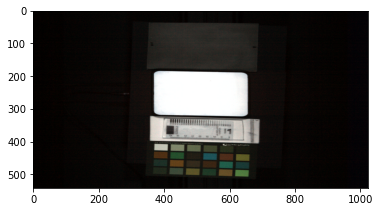

In [15]:
#%matplotlib notebook
whiteref_data = white_open.load()
sp.imshow(whiteref_data,(33,66,99), stretch=0.05)

In [18]:
# Get regions for each panel
whiteref_panel = whiteref_data[200:299,400:620,:] ## Y1:Y2,X1:X2,All bands
greyref_panel = whiteref_data[80:150,400:620,:]
#darkref_panel = whiteref_data[70:152,870:1150,:]

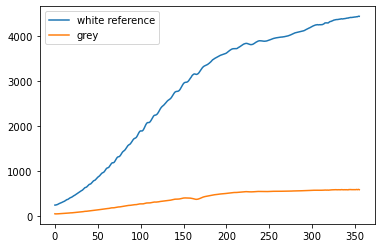

In [20]:
%matplotlib inline
## Mean per band
whitereference = whiteref_panel.mean(axis=(0, 1))
greyreference = greyref_panel.mean(axis=(0, 1))
#darkreference = darkref_panel.mean(axis=(0, 1))
plt.plot(whitereference, label='white reference')
plt.plot(greyreference, label='grey')
#plt.plot(darkreference, label='dark')
plt.legend()

## RAW test

In [13]:
# Dark reference is always the first file in the directory
#dark_open = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_PRO~1\IMAGIN~1\PHENOT~1\data\RAW-DA~1\KESTRE~1\LIFF5B~1\capture\DARKRE~1.HDR", r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_PRO~1\IMAGIN~1\PHENOT~1\data\RAW-DA~1\KESTRE~1\LIFF5B~1\capture\DARKRE~1.RAW")
#white_r_open = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\Raw-Dark-Tests\Kestrel_CCA_Raw\Lithogenic_Spectra_gradient_2021-06-25_13-10-46\capture\Lithogenic_Spectra_gradient_2021-06-25_13-10-46.hdr", r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\Raw-Dark-Tests\Kestrel_CCA_Raw\Lithogenic_Spectra_gradient_2021-06-25_13-10-46\capture\Lithogenic_Spectra_gradient_2021-06-25_13-10-46.raw")

C:\Users\jcmontes\Miniconda3\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


### Dark reference

In [16]:
## Load Dark Ref
darkref_data = dark_open.load()

## Mean per band
darkreference = darkref_data.mean(axis=(0, 1))
#plt.plot(darkreference)

In [22]:
#whiteref_r_data = white_r_open.load()
## Mean per band
#white_r_reference = whiteref_r_data.mean(axis=(0, 1))
#plt.plot(white_r_reference)

### White reference - Dark reference

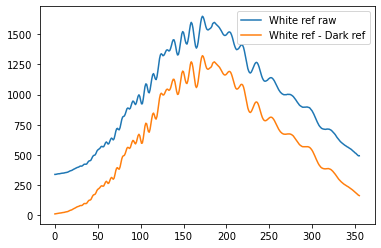

In [19]:
calibrated_panel = whitereference - darkreference
plt.plot(whitereference, label='White ref raw')
plt.plot(calibrated_panel, label='White ref - Dark ref')
plt.legend()

In [18]:
# Get regions for each panel
#whiteref_r_panel = whiteref_r_data[360:455,900:1170,:] ## Y1:Y2,X1:X2,All bands
#greyref_r_panel = whiteref_r_data[219:310,880:1155,:]
#darkref_r_panel = whiteref_r_data[70:152,870:1150,:]

In [20]:
#%matplotlib inline
## Mean per band
#white_r_reference = whiteref_r_panel.mean(axis=(0, 1))
#grey_r_reference = greyref_r_panel.mean(axis=(0, 1))
#dark_r_reference = darkref_r_panel.mean(axis=(0, 1))
#plt.plot(white_r_reference, label='raw white')
#plt.plot(grey_r_reference, label='raw grey')
#plt.plot(dark_r_reference, label='raw dark')
#plt.legend()

In [21]:
print('Shape: ' + str(calibrated_panel.shape))
print('WhiteRef at 0: ' + str(whitereference[0]))
print('DarkRef at 0: ' + str(darkreference[0]))
print('Calibrated panel at 0: ' + str(calibrated_panel[0]))

Shape: (356,)
WhiteRef at 0: 338.11517
DarkRef at 0: 327.33932
Calibrated panel at 0: 10.775848


### Save Calibrated Panel

In [23]:
np.save(out_path / 'WhitePanel', whitereference)
np.save(out_path / 'GreyPanel', greyreference)
#np.save(out_path / 'DarkPanel', darkreference)

## End of notebook